In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [5]:
!kaggle datasets download -d smeschke/four-shapes

 65% 14.0M/21.6M [00:00<00:00, 43.7MB/s]
100% 21.6M/21.6M [00:00<00:00, 71.9MB/s]


In [9]:
#Extract Dataset
import zipfile as zf

try:
  dataset = 'four-shapes.zip'
  extract_directory = 'dataset/shape/'

  extract_dataset = zf.ZipFile(dataset)
  extract_dataset.extractall(extract_directory)
  extract_dataset.close()
  print('ekstraksi dataset selesai')
  
except(FileNotFoundError,FileExistsError):
  print('Dataset tidak ditemukan')
except:
  print('terjadi kesalahan')
finally:
  print('End the process')

ekstraksi dataset selesai
End the process


In [51]:
#listing and get data from dataset
import os
directory = 'dataset/'
MainDir = os.path.join(directory,'shape/shapes')
MainDirlist = os.listdir(MainDir)

print(MainDirlist)

print('\n list data {}'.format(MainDir))

classLen = []
dirlist = []

for i in MainDirlist:
    dir = os.path.join(MainDir,i)
    print('directory {}'.format(dir))
    dirlist.append(dir)
    dirQty = len(os.listdir(dir))
    print('{} data'.format(dirQty))

    classLen.append(dirQty)
    
print('Total image data : {}'.format(sum(classLen)))

['circle', 'square', 'star', 'triangle']

 list data dataset/shape/shapes
directory dataset/shape/shapes/circle
3720 data
directory dataset/shape/shapes/square
3765 data
directory dataset/shape/shapes/star
3765 data
directory dataset/shape/shapes/triangle
3720 data
Total image data : 14970


In [52]:
circle_data = os.listdir(dirlist[0])
square_data = os.listdir(dirlist[1])
star_data = os.listdir(dirlist[2])
triagle_data = os.listdir(dirlist[3])

classQty = len(MainDirlist)
className = MainDirlist
print('Class Name : {}'.format(className))
print('Class Qty  : {}'.format(classQty))

Class Name : ['circle', 'square', 'star', 'triangle']
Class Qty  : 4


class circle


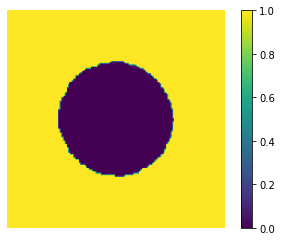

class square


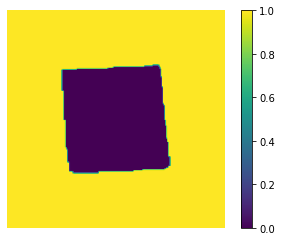

class star


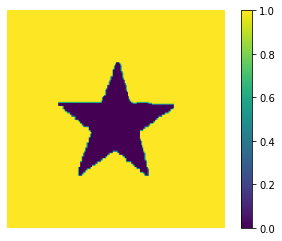

class triangle


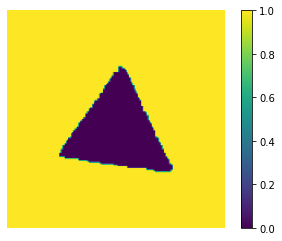


 operation terminated



In [53]:
#Image Evaluation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

show = 1

try:
  circle = [os.path.join(dirlist[0],fname)for fname in circle_data[show-1:show]]
  square = [os.path.join(dirlist[1],fname)for fname in square_data[show-1:show]]
  star = [os.path.join(dirlist[2],fname) for fname in star_data[show-1:show]]
  triagle = [os.path.join(dirlist[3],fname) for fname in triagle_data[show-1:show]]

  for i,img_path in enumerate(circle + square + star + triagle):

    print('class {}'.format(className[i]))
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.colorbar()
    plt.axis('off')
    plt.show()
except(FileExistsError,FileNotFoundError):
  print('directory tidak valid')
 
finally:
  print('\n operation terminated\n')

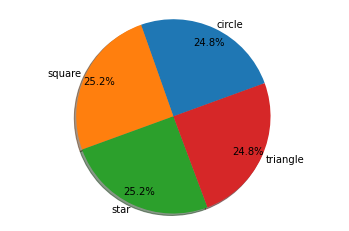

In [54]:
import matplotlib.pyplot as plt

size = classLen
labels = MainDirlist

plt.pie(
    size,
    labels=labels,
    autopct='%.1f%%',
    shadow=True,
    pctdistance=0.85,
    labeldistance=1.05,
    startangle=20,
    explode=[0 if 1 > 0 else 0.2 for i in range(len(size))]
)
plt.axis('equal')
plt.show()

In [55]:
#dataset Preprocessing
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

batchsize = 128
img_w = 150
img_h = 150


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


trainDatagen = datagen.flow_from_directory(
  MainDir,
  batch_size = batchsize,
  target_size=(img_w,img_h),
  shuffle=True,
  class_mode='categorical',
  interpolation='nearest',
  subset='training'
)


validationDatagen = datagen.flow_from_directory(
    MainDir,
    batch_size = batchsize,
    target_size=(img_w,img_h),
    shuffle=True,
    class_mode='categorical',
    interpolation='nearest',
    subset='validation'
)



Found 11976 images belonging to 4 classes.
Found 2994 images belonging to 4 classes.


In [56]:
classind = trainDatagen.class_indices
classmode = trainDatagen.class_mode
shape = trainDatagen.image_shape

print(classind)
print(classmode)
print(shape)

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}
categorical
(150, 150, 3)


In [57]:
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


color = 3


model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(img_w,img_h,color)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(1024,(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(classQty,activation='softmax'))


model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.0001),
    metrics = ['accuracy']

)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 74, 74, 256)       147712    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 37, 37, 256)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 512)       1180160   
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 18, 512)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 1024)     

In [58]:
#fit model
import datetime
import tensorboard as tb

log_dir = 'logs/fit/'+ datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
file_writer = tf.summary.create_file_writer('/path/to/logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

ACC_TRESHOLD = 0.98
ACC_val = 0.92

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy') > ACC_TRESHOLD) and (logs.get('val_accuracy') > ACC_val ):
      print('\n akurasi mencapai {}&'.format(ACC_TRESHOLD*100))
      self.model.stop_training = True

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)


acc_stop = Callback()
saveLog = tf.keras.callbacks.CSVLogger('OCTmodel(tf_lite)Log.csv',separator=',',append=False)

with tf.device('/device:GPU:0'):
  histSave =  model.fit(
      trainDatagen,
      epochs = 50,
      batch_size = batchsize,
      validation_data = validationDatagen,
      callbacks=[acc_stop,saveLog,tensorboard_callback],
      steps_per_epoch = 20,
      verbose=1,
      validation_steps=3
  )
   
model.save('Shapemodel(tf_lite).h5')

print('Training selesai')

Epoch 1/50
20/20 [==============================] - 29s 1s/step - loss: 1.2902 - accuracy: 0.3875 - val_loss: 0.9790 - val_accuracy: 0.5833
Epoch 2/50
20/20 [==============================] - 27s 1s/step - loss: 0.7980 - accuracy: 0.6297 - val_loss: 0.3626 - val_accuracy: 0.9036
Epoch 3/50
20/20 [==============================] - 27s 1s/step - loss: 0.5282 - accuracy: 0.7746 - val_loss: 0.2574 - val_accuracy: 0.9115
Epoch 4/50
20/20 [==============================] - 27s 1s/step - loss: 0.3846 - accuracy: 0.8406 - val_loss: 0.1764 - val_accuracy: 0.9531
Epoch 5/50
20/20 [==============================] - 27s 1s/step - loss: 0.3514 - accuracy: 0.8438 - val_loss: 0.3506 - val_accuracy: 0.8438
Epoch 6/50
20/20 [==============================] - 26s 1s/step - loss: 0.2447 - accuracy: 0.9018 - val_loss: 0.1486 - val_accuracy: 0.9401
Epoch 7/50
20/20 [==============================] - 27s 1s/step - loss: 0.1836 - accuracy: 0.9325 - val_loss: 0.0879 - val_accuracy: 0.9661
Epoch 8/50
20/20 [==

In [65]:
#tensorflow lite deployed saved model

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
savename = 'ShapelassificationModel.tflite'
filesave = os.path.join('/content/gdrive/My Drive/Kaggle/',savename)

open(filesave,'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpeniph2fw/assets


INFO:tensorflow:Assets written to: /tmp/tmpeniph2fw/assets


366309020

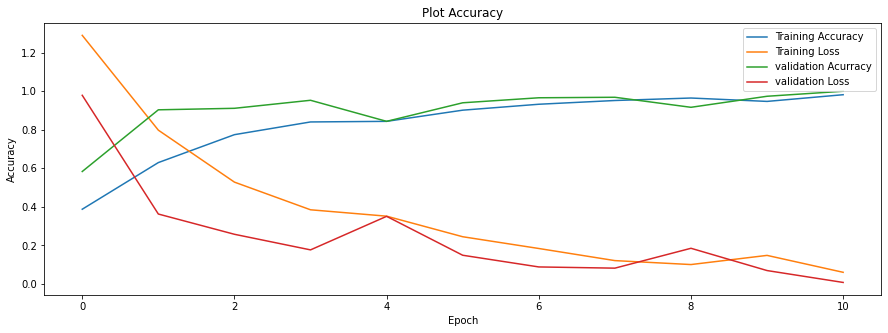

In [59]:
#plotting acc
import datetime
import matplotlib.pyplot as plt

acc = histSave.history['accuracy']
epoch = range(len(acc))
val_acc = histSave.history['val_accuracy']
val_loss = histSave.history['val_loss']
loss = histSave.history['loss']

plt.figure(figsize=(15,5))
plt.plot(epoch,acc,label='Training Accuracy')
plt.plot(epoch,loss,label='Training Loss')
plt.plot(epoch,val_acc,label='validation Acurracy')
plt.plot(epoch,val_loss,label='validation Loss')
plt.title('Plot Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [60]:
#Prediction
import os
from google.colab import files
from keras.preprocessing import image
import numpy as np


def predict():
  try:
  
    uploaded = files.upload()
    idx = 0
    CLASS = className

    for fn in uploaded.keys():
      path = fn
      img = image.load_img(path, target_size=(img_w,img_h))
      imgArr = image.img_to_array(img)
      imgArr = np.expand_dims(imgArr,axis=0)
  
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    images = np.vstack([imgArr])
    predict = model.predict(images,batch_size=10)

    if predict[0,0] == 1:
       idx = 0
    elif predict[0,1] == 1:
      idx = 1
    elif predict[0,2] == 1:
      idx = 2
    elif predict[0,3] == 1:
      idx = 3

    print('Predict : {}'.format(CLASS[idx]))
  except:
    print('Predict gagal')


Saving 6.png to 6 (1).png


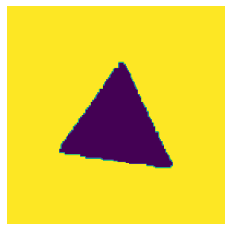

Predict : triangle


In [61]:
predict()

Saving 225.png to 225 (1).png


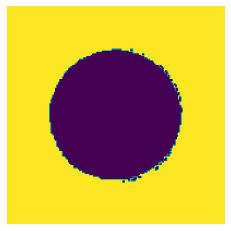

Predict : circle


In [62]:
predict()

Saving 5.png to 5 (2).png


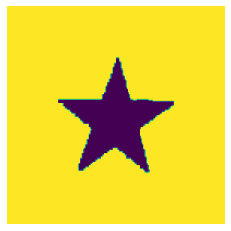

Predict : star


In [63]:
predict()

Saving 1.png to 1 (1).png


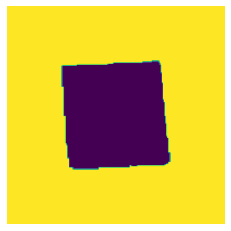

Predict : square


In [64]:
predict()